# TO DO: split the data into training and testing samples

### First, joing the test and train data into one, to split them and train the coding

In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [302]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")

In [303]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [304]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [305]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [306]:
union_df = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [307]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 157.7+ KB


In [308]:
union_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [309]:
data = union_df.copy()

In [310]:
data.describe(include="all")

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,2521.000000,2521.000000,2521.000000,2521,2097.000000,2097,2521.000000,2.521000e+03
unique,NaN,NaN,NaN,1,NaN,2,NaN,NaN
top,NaN,NaN,NaN,sqft,NaN,sqft,NaN,NaN
freq,NaN,NaN,NaN,2521,NaN,1818,NaN,NaN
mean,2.877033,2.171956,1758.998017,NaN,3896.245794,NaN,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,NaN,2714.651578,NaN,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,NaN,0.230000,NaN,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,NaN,1263.000000,NaN,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,NaN,4001.000000,NaN,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,NaN,6000.000000,NaN,98126.000000,1.115000e+06


In [311]:
data["size_units"].value_counts()

size_units
sqft    2521
Name: count, dtype: int64

In [312]:
data["lot_size_units"].value_counts()

lot_size_units
sqft    1818
acre     279
Name: count, dtype: int64

##### I have to change the units to the same units, but first lets categorize zip codes accorgin to socioeconomic status and drop the columns not needed.

In [313]:
# Done by copilot, which claims that it is based on median household income of the areas under the given zipcode.

seattle_zip_categories = {

   "98144": "middle lower",
    "98106": "middle lower",
    "98107": "middle upper",
    "98199": "affluent",
    "98102": "middle upper",
    "98133": "middle lower",
    "98105": "middle lower",
    "98108": "middle lower",
    "98178": "middle lower",
    "98103": "middle upper",
    "98177": "affluent",
    "98115": "middle upper",
    "98122": "middle lower",
    "98119": "middle upper",
    "98117": "affluent",
    "98116": "middle upper",
    "98146": "middle lower",
    "98109": "middle upper",
    "98125": "middle lower",
    "98101": "middle lower",
    "98126": "middle lower",
    "98118": "middle lower",
    "98112": "affluent",
    "98121": "affluent",
    "98136": "affluent",
    "98168": "lower",
    "98104": "lower",
    "98164": "affluent",
    "98188": "lower"

}


In [314]:
data["zip_code_category"] = data.apply(lambda row: seattle_zip_categories.get(str(row["zip_code"])), axis = 1)

In [315]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,zip_code_category
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0,middle lower
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0,middle lower
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0,middle upper
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0,affluent
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0,middle upper


In [316]:
data["zip_code"].unique()

array([98144, 98106, 98107, 98199, 98102, 98133, 98105, 98108, 98178,
       98103, 98177, 98115, 98122, 98119, 98117, 98116, 98146, 98109,
       98125, 98101, 98126, 98118, 98112, 98121, 98136, 98168, 98104,
       98164, 98188], dtype=int64)

In [317]:
data[data["zip_code_category"].isnull()]

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,zip_code_category


In [318]:
data.drop(columns=["zip_code","size_units"], inplace=True)

In [319]:
data.isnull().sum()

beds                   0
baths                  0
size                   0
lot_size             424
lot_size_units       424
price                  0
zip_code_category      0
dtype: int64

##### What is the proportion potentially dropped?

In [320]:
424/2521

0.16818722729075763

In [321]:
data.dropna(axis=0, inplace=True)

In [322]:
data_no_missing_values = data.copy()

In [323]:
data_no_missing_values.head()

,beds,baths,size,lot_size,lot_size_units,price,zip_code_category
0,3,2.5,2590.0,6000.00,sqft,795000.0,middle lower
1,4,2.0,2240.0,0.31,acre,915000.0,middle lower
2,4,3.0,2040.0,3783.00,sqft,950000.0,middle upper
3,4,3.0,3800.0,5175.00,sqft,1950000.0,affluent
5,2,2.0,1190.0,1.00,acre,740000.0,middle upper


In [324]:
conversion_factors = {
    'acre': 43560,
    'sqm': 10.7639,
    'sqft': 1
}

data_no_missing_values["lot_size_in_sqft"] = data_no_missing_values.apply (lambda row: row["lot_size"] * conversion_factors.get(row["lot_size_units"], 1), axis=1)

In [325]:
data_no_missing_values.columns

Index(['beds', 'baths', 'size', 'lot_size', 'lot_size_units', 'price',
       'zip_code_category', 'lot_size_in_sqft'],
      dtype='object')

In [326]:
data_no_missing_values.drop(columns=['lot_size', 'lot_size_units'], axis=1, inplace=True)

In [327]:
data_no_missing_values.rename(columns={"size": "size_in_sqft"}, inplace=True)

In [328]:
data_no_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2520
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beds               2097 non-null   int64  
 1   baths              2097 non-null   float64
 2   size_in_sqft       2097 non-null   float64
 3   price              2097 non-null   float64
 4   zip_code_category  2097 non-null   object 
 5   lot_size_in_sqft   2097 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 114.7+ KB


In [329]:
data_no_missing_values.describe(include="all")

,beds,baths,size_in_sqft,price,zip_code_category,lot_size_in_sqft
count,2097.000000,2097.000000,2097.000000,2.097000e+03,2097,2.097000e+03
unique,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,middle lower,NaN
freq,NaN,NaN,NaN,NaN,907,NaN
mean,3.137339,2.305436,1916.727706,1.039809e+06,NaN,1.678385e+04
std,1.175945,1.010824,915.073679,9.415656e+05,NaN,2.571518e+05
min,1.000000,0.500000,250.000000,1.590000e+05,NaN,5.000000e+02
25%,2.000000,1.500000,1280.000000,6.850000e+05,NaN,3.000000e+03
50%,3.000000,2.000000,1740.000000,8.700000e+05,NaN,5.000000e+03
75%,4.000000,3.000000,2390.000000,1.180000e+06,NaN,7.407000e+03


### Here I have the data prepared for the final preprocessing - outliers cut.

In [330]:
data_clean = data_no_missing_values.copy()

In [331]:
sns.set_theme(style="darkgrid")

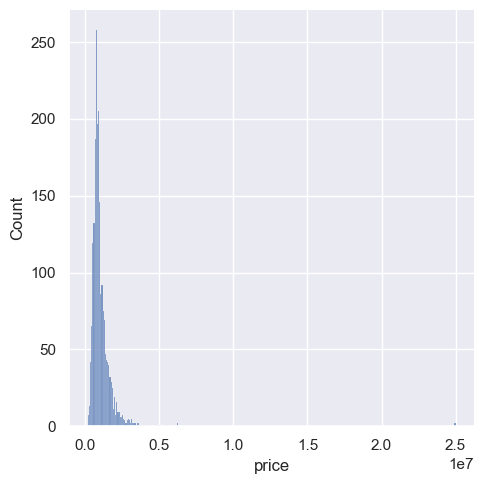

In [332]:
sns.displot(data_clean["price"])

##### Lets drop above q3 + 1,5 * interquartille range in price.

In [333]:
q1 = data_clean["price"].quantile(0.25)
q3 = data_clean["price"].quantile(0.75)
iqr = q3 - q1
outlier_price_upper = q3 + 1.5 * iqr
outlier_price_lower = q1 - 1.5 * iqr

In [334]:
data_price_outliers = data_clean[data_clean["price"].between(outlier_price_lower, outlier_price_upper)]

In [335]:
data_price_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2520
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beds               1962 non-null   int64  
 1   baths              1962 non-null   float64
 2   size_in_sqft       1962 non-null   float64
 3   price              1962 non-null   float64
 4   zip_code_category  1962 non-null   object 
 5   lot_size_in_sqft   1962 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 107.3+ KB


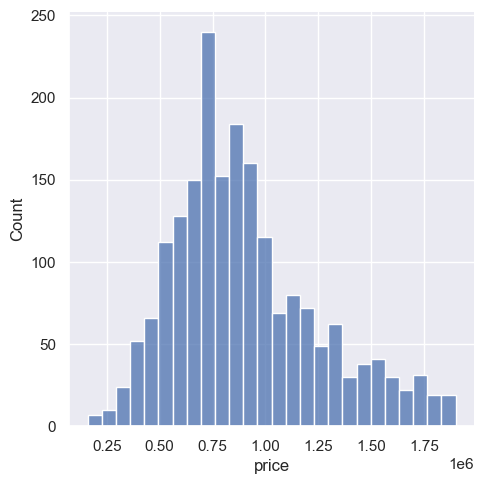

In [336]:
sns.displot(data_price_outliers["price"])

##### Get rid of the beds outliers base on IQR again.

In [337]:
q1 = data_price_outliers["beds"].quantile(0.25)
q3 = data_price_outliers["beds"].quantile(0.75)
iqr = q3 - q1
outlier_beds_upper = q3 + 1.5 * iqr
outlier_beds_lower = q1 - 1.5 * iqr

In [338]:
data_beds_outliers = data_price_outliers[data_price_outliers["beds"].between(outlier_beds_lower, outlier_beds_upper)]

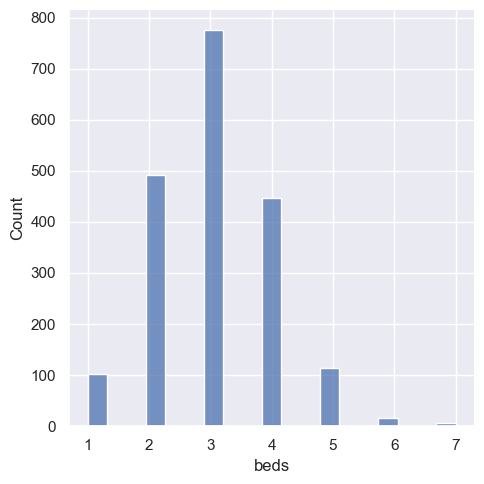

In [339]:
sns.displot(data_beds_outliers["beds"])

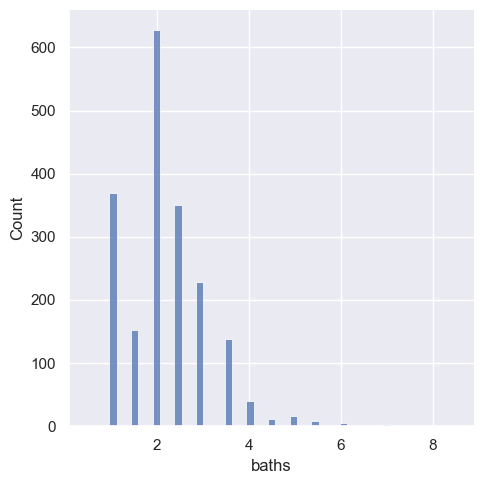

In [340]:
sns.displot(data_beds_outliers["baths"])

##### Get rid of baths outliers based on IQR again.

In [341]:
q1 = data_beds_outliers["baths"].quantile(0.25)
q3 = data_beds_outliers["baths"].quantile(0.75)
iqr = q3 - q1
outlier_baths_upper = q3 + 1.5 * iqr
outlier_baths_lower = q1 - 1.5 * iqr

In [342]:
data_baths_outliers = data_beds_outliers[data_beds_outliers["baths"].between(outlier_baths_lower, outlier_baths_upper)]

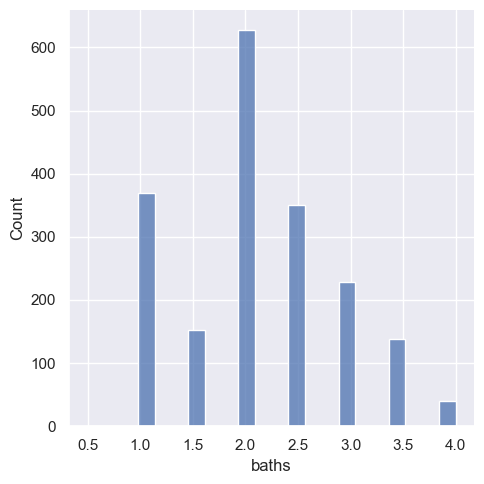

In [343]:
sns.displot(data_baths_outliers["baths"])

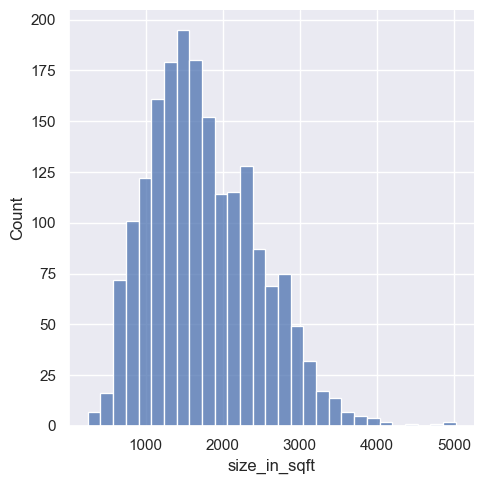

In [344]:
sns.displot(data_baths_outliers["size_in_sqft"])

In [345]:
q = data_baths_outliers["size_in_sqft"].quantile(0.99)
q

3549.5200000000004

In [346]:
q1 = data_baths_outliers["size_in_sqft"].quantile(0.25)
q3 = data_baths_outliers["size_in_sqft"].quantile(0.75)
iqr = q3 - q1
outlier_size_upper = q3 + 1.5 * iqr
outlier_size_lower = q1 - 1.5 * iqr
print(outlier_size_lower, outlier_size_upper)

-304.0 3780.0


In [347]:
data_size_in_sqt_outliers = data_baths_outliers[data_baths_outliers["size_in_sqft"].between(outlier_size_lower, outlier_size_upper)]

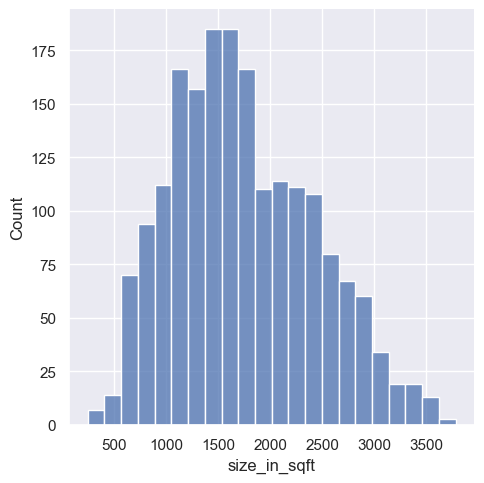

In [348]:
sns.displot(data_size_in_sqt_outliers["size_in_sqft"])

In [349]:
data_size_in_sqt_outliers["lot_size_in_sqft"].describe()

count    1.894000e+03
mean     1.769926e+04
std      2.705523e+05
min      5.000000e+02
25%      2.600000e+03
50%      5.000000e+03
75%      7.235500e+03
max      1.089000e+07
Name: lot_size_in_sqft, dtype: float64

In [350]:
q1 = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.25)
q3 = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.75)
iqr = q3 - q1
outlier_lot_size_upper = q3 + 1.5 * iqr
outlier_lot_size_lower = q1 - 1.5 * iqr

In [351]:
data_prepro = data_size_in_sqt_outliers[data_size_in_sqt_outliers["lot_size_in_sqft"].between(outlier_lot_size_lower, outlier_lot_size_upper)]

In [352]:
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 0 to 2520
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   beds               1732 non-null   int64  
 1   baths              1732 non-null   float64
 2   size_in_sqft       1732 non-null   float64
 3   price              1732 non-null   float64
 4   zip_code_category  1732 non-null   object 
 5   lot_size_in_sqft   1732 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 94.7+ KB


In [353]:
data_clean = data_prepro.copy()

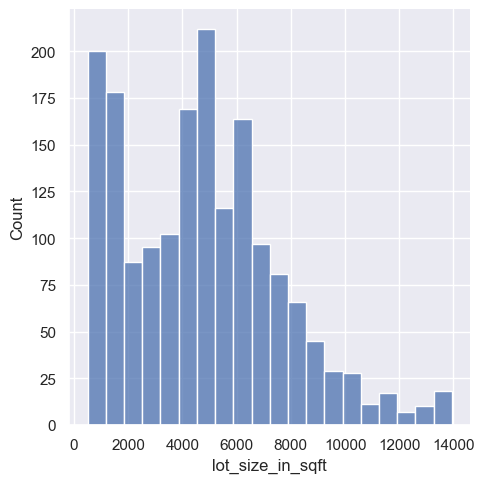

In [354]:
sns.displot(data_clean["lot_size_in_sqft"])

In [355]:
data_clean.describe(include="all")

,beds,baths,size_in_sqft,price,zip_code_category,lot_size_in_sqft
count,1732.000000,1732.000000,1732.000000,1.732000e+03,1732,1732.000000
unique,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,middle lower,NaN
freq,NaN,NaN,NaN,NaN,760,NaN
mean,3.064665,2.155889,1786.006351,9.143575e+05,NaN,4749.304273
std,0.947726,0.771537,662.410405,3.297815e+05,NaN,2868.364768
min,1.000000,0.500000,376.000000,1.594880e+05,NaN,500.000000
25%,2.000000,1.500000,1290.000000,6.900000e+05,NaN,2280.000000
50%,3.000000,2.000000,1700.000000,8.500000e+05,NaN,4800.000000
75%,4.000000,2.500000,2262.500000,1.095000e+06,NaN,6348.500000


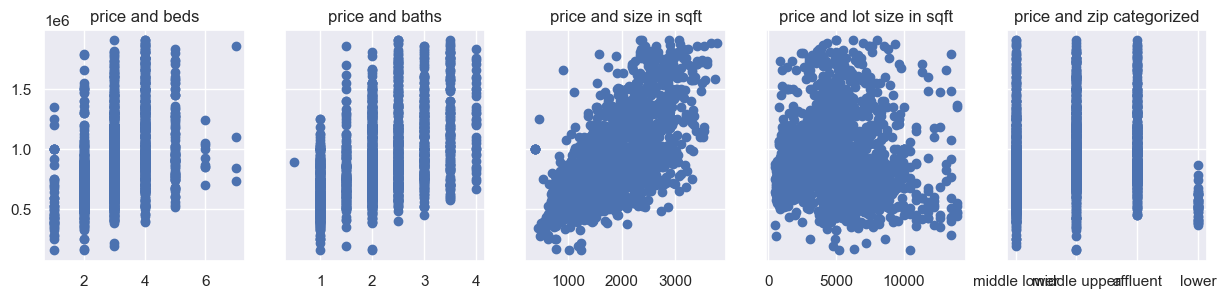

In [356]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data_clean["beds"],data_clean["price"])
ax1.set_title("price and beds")
ax2.scatter(data_clean["baths"],data_clean["price"])
ax2.set_title("price and baths")
ax3.scatter(data_clean["size_in_sqft"],data_clean["price"])
ax3.set_title("price and size in sqft")
ax4.scatter(data_clean["lot_size_in_sqft"],data_clean["price"])
ax4.set_title("price and lot size in sqft")
ax5.scatter(data_clean["zip_code_category"],data_clean["price"])
ax5.set_title("price and zip categorized")
plt.show()

#### Since variable "lot size in sqft" seems to have no impact on the price, I will drop it.

In [357]:
data_clean.drop(columns=["lot_size_in_sqft"], inplace=True, axis = 1)

In [358]:
data_clean.reset_index(drop=True, inplace=True)

In [359]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_clean[['baths','size_in_sqft']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,9.173822,baths
1,9.173822,size_in_sqft


### Since the beds are giving higher VIFs, lets drop them. Until 10, it is kind of acceptable.

In [360]:
data_clean.drop(columns=["beds"], inplace=True)

In [361]:
pd.get_dummies(data_clean, drop_first=True).astype(int)

,baths,size_in_sqft,price,zip_code_category_lower,zip_code_category_middle lower,zip_code_category_middle upper
0,2,2590,795000,0,1,0
1,2,2240,915000,0,1,0
2,3,2040,950000,0,0,1
3,1,670,460000,0,1,0
4,2,1520,565000,0,1,0
...,...,...,...,...,...,...
1727,2,2275,1528000,0,1,0
1728,2,1250,770000,0,0,1
1729,1,1088,628000,0,0,0
1730,2,1390,575000,0,1,0


### Do the linear regression basics and checkt the relevance of the variables

In [362]:
x = data_clean[["beds", "baths","size_in_sqft"]]
y = data_clean["price"]

KeyError: "['beds'] not in index"

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x, y)

In [ ]:
reg.score(x, y)

In [ ]:
# Do feature selection with standardization, následně rozdělím data na testovací a trénovací a provedu standardizaci na trénovací a regresi na trénovací